In [1]:
!pip install python-igraph
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install easygui
!pip install cairocffi
!pip install pm4py


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [23]:
import igraph as ig
import easygui
from matplotlib import pyplot as plt
import numpy as np
import scipy
import statistics
import pandas as pd
import pm4py
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [24]:
import pandas as pd
from igraph import Graph, plot
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV
transactions = pd.read_csv('TRANSACTION1.csv', sep=';')
securities_transactions = transactions[(transactions['FromAccountId'] != 0) | (transactions['ToAccountId'] != 0)].copy()

eventlog = pd.read_csv('eventlog.csv', sep=';')

In [25]:
#join transactions with event log
network_df = pd.merge(eventlog, securities_transactions, left_on=['TID'], right_on=['TID'], how='inner')
print(network_df)

        TID            Starttime              Endtime  \
0         1  2024-03-02 00:00:19  2024-03-02 00:00:20   
1         1  2024-03-02 00:00:20  2024-03-02 00:00:20   
2         2  2024-03-02 00:00:37  2024-03-02 00:00:38   
3         2  2024-03-02 00:00:38  2024-03-02 00:00:38   
4         5  2024-03-02 00:01:41  2024-03-02 00:01:42   
...     ...                  ...                  ...   
23715  9782  2024-03-02 21:58:43  2024-03-02 21:58:44   
23716  9783  2024-03-02 21:59:08  2024-03-02 21:59:09   
23717  9783  2024-03-02 21:59:09  2024-03-02 21:59:10   
23718  9784  2024-03-02 21:59:47  2024-03-02 21:59:48   
23719  9784  2024-03-02 21:59:48  2024-03-02 21:59:49   

                           Activity                 Time         Value  \
0                        Validating  2024-03-02 00:00:19  1.757210e+08   
1      Waiting in backlog unmatched  2024-03-02 00:00:19  1.757210e+08   
2                        Validating  2024-03-02 00:00:37  1.919393e+08   
3      Waiting in b

In [26]:
# Assuming 'network_df' contains your data
df = network_df[network_df['Activity'] == "Settling"].copy()

# # Subtract 1 from every value in the FromParticipantId and ToParticipantId columns so that Part Ids start from 0 compatible with igraph
# df['FromParticipantId'] = df['FromParticipantId'] - 1
# df['ToParticipantId'] = df['ToParticipantId'] - 1




In [69]:
df.to_csv("merged.csv")

# 1 edge = 1 transaction

Participant 1 - In-degree: 173, Out-degree: 127
Participant 2 - In-degree: 54, Out-degree: 0
Participant 3 - In-degree: 135, Out-degree: 161
Participant 4 - In-degree: 179, Out-degree: 195
Participant 5 - In-degree: 128, Out-degree: 182
Participant 6 - In-degree: 258, Out-degree: 171
Participant 7 - In-degree: 285, Out-degree: 143
Participant 8 - In-degree: 180, Out-degree: 143
Participant 9 - In-degree: 38, Out-degree: 0
Participant 10 - In-degree: 181, Out-degree: 131
Participant 11 - In-degree: 201, Out-degree: 231
Participant 12 - In-degree: 185, Out-degree: 216
Participant 13 - In-degree: 238, Out-degree: 217
Participant 14 - In-degree: 197, Out-degree: 231
Participant 15 - In-degree: 212, Out-degree: 239
Participant 16 - In-degree: 202, Out-degree: 191
Participant 17 - In-degree: 155, Out-degree: 168
Participant 18 - In-degree: 0, Out-degree: 181
Participant 19 - In-degree: 201, Out-degree: 233
Participant 20 - In-degree: 175, Out-degree: 217


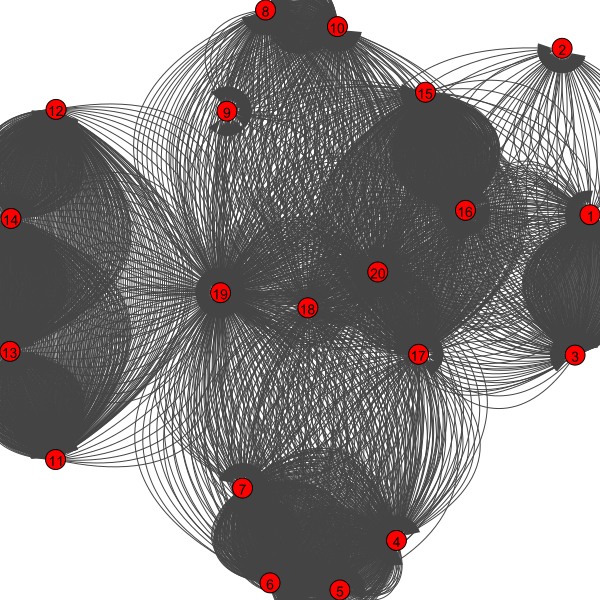

In [5]:
import pandas as pd
from igraph import Graph, plot
import matplotlib.pyplot as plt
import numpy as np

# Extract unique participant IDs
from_participants = df['FromParticipantId'].unique()
to_participants = df['ToParticipantId'].unique()
all_participants = np.unique(np.concatenate((from_participants, to_participants)))

# Create a graph with participants as nodes
g = Graph(directed=True)
g.add_vertices(all_participants.astype(str))

# Add edges for each transaction
for _, row in df.iterrows():
    g.add_edge(str(row['FromParticipantId']), str(row['ToParticipantId']))

# Calculate in-degree and out-degree for each participant
in_degree = g.indegree()
out_degree = g.outdegree()

# Print results
for v in g.vs:
    print(f"Participant {v['name']} - In-degree: {in_degree[v.index]}, Out-degree: {out_degree[v.index]}")

# Visualize the graph
layout = g.layout('kk')  # Kamada-Kawai layout
visual_style = {
    "vertex_size": 20,
    "vertex_label": g.vs['name'],
    "edge_width": [1 for _ in g.es],  # Uniform edge width as weights are not considered
    "layout": layout,
    "bbox": (600, 600),
    "margin": 10
}
plot(g, **visual_style)


# edge = total value
### degree en visual klopt niet altijd zo te zien

In [ ]:
pip install ipywidgets
pip install pillow

### Cumulatief 

In [9]:
import pandas as pd
from igraph import Graph, plot
import numpy as np
from PIL import Image, ImageDraw, ImageFont

timeframe = 15

# Convert Starttime to datetime
df['Starttime'] = pd.to_datetime(df['Starttime'])

# Define the start and end of the day
start_day = pd.to_datetime('2024-03-02 00:00:00')
end_day = pd.to_datetime('2024-03-02 23:59:59')
test_start = pd.to_datetime('2024-03-02 01:35:00')
test_stop = pd.to_datetime('2024-03-02 01:40:00')  # Shortened range for testing

minute_df = df[(df['Starttime'] >= start_day) & (df['Starttime'] <= end_day)].copy()

# Ensure the IDs are treated as integers and then convert to strings
minute_df['FromParticipantId'] = minute_df['FromParticipantId'].astype(int).astype(str)
minute_df['ToParticipantId'] = minute_df['ToParticipantId'].astype(int).astype(str)

# Extract all unique participants for creating nodes
all_participants = np.unique(np.concatenate((minute_df['FromParticipantId'].unique(), minute_df['ToParticipantId'].unique())))

# Set a random seed for layout consistency
np.random.seed(75)

# Create a graph with participants as nodes for layout computation
g_all = Graph(directed=True)
g_all.add_vertices(all_participants)
g_all.vs['name'] = all_participants

# Add edges from minute_df for layout computation
transaction_sums = minute_df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
for _, row in transaction_sums.iterrows():
    from_id = str(row['FromParticipantId'])
    to_id = str(row['ToParticipantId'])
    if row['Value'] != 0:
        g_all.add_edge(from_id, to_id, weight=row['Value'])

# Precompute the layout for all nodes (to keep positions of singletons consistent)
fixed_layout = g_all.layout('kk')  # Fruchterman-Reingold layout

png_counter = 1
# Loop through each minute of the day
current_time = start_day
next_time = current_time + pd.Timedelta(minutes=timeframe) - pd.Timedelta(seconds=1)
while next_time <= end_day:
    
    # Filter the DataFrame to keep only transactions within the current minute
    minute_df = df[(df['Starttime'] >= current_time) & (df['Starttime'] <= next_time)].copy()
    
    # Convert IDs to string after filtering to maintain consistency
    minute_df['FromParticipantId'] = minute_df['FromParticipantId'].astype(str)
    minute_df['ToParticipantId'] = minute_df['ToParticipantId'].astype(str)
    
    # Create a graph with participants as nodes
    g = Graph(directed=True)
    g.add_vertices(all_participants)
    g.vs['name'] = all_participants  # Set the name attribute for each vertex
    
    if not minute_df.empty:
        # Aggregate transaction values by pairs
        transaction_sums = minute_df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
        
        # Add aggregated edges, ensuring consistency in string usage
        for _, row in transaction_sums.iterrows():
            try:
                if row['Value'] != 0:
                    g.add_edge(row['FromParticipantId'], row['ToParticipantId'], weight=row['Value'])
            except ValueError as e:
                print(f"Error adding edge from {row['FromParticipantId']} to {row['ToParticipantId']}: {e}")

        # Normalize edge weights for visualization
        weights = np.array(g.es["weight"])
        if len(weights) > 1:
            normalized_weights = 1 + 9 * (weights - weights.min()) / (weights.max() - weights.min())
        else:
            normalized_weights = []

    else:
        normalized_weights = []

    # Use the precomputed layout for visualization
    layout = fixed_layout
    
    # Visualize the graph
    visual_style = {
        "vertex_size": 20,
        "vertex_label": g.vs['name'],
        "layout": layout,
        "bbox": (1920, 1080),
        "margin": 50
    }
    if len(normalized_weights) > 0:
        visual_style["edge_width"] = normalized_weights  # Add edge widths if there are edges
    
    # Save the plot as a PNG file
    file_name = f"video-cumulatief/graph_{png_counter}.png"
    plot(g, target=file_name, **visual_style)

    # Add title using PIL
    # Open the image
    image = Image.open(file_name)
    draw = ImageDraw.Draw(image)
    
    # Define the title text
    title_text = f"Network Graph at {current_time.strftime('%Y-%m-%d %H:%M:%S')} - {next_time.strftime('%Y-%m-%d %H:%M:%S')}"
    
    # Define font and size (adjust path to your font if necessary)
    font = ImageFont.truetype("arial.ttf", 12)
    
    # Calculate text bounding box
    text_bbox = draw.textbbox((0, 0), title_text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    
    # Set text position
    text_position = ((image.width - text_width) // 2, 10)
    
    # Add text to image
    draw.text(text_position, title_text, font=font, fill="black")
    
    # Save the image with the title
    image.save(file_name)
    
    # For testing purposes, manual check
    #minute_df.to_csv(f"df_{current_time.strftime('%Y-%m-%d_%H-%M-%S')}.csv", index=False)
    
    # Print confirmation message
    #print(f"Graph for {current_time.strftime('%Y-%m-%d %H:%M:%S')} has been drawn and saved as {file_name}.")
    
    # Move to the next minute
    next_time += pd.Timedelta(minutes=timeframe)
    png_counter += 1


### niet-cumulatief

In [16]:
import pandas as pd
from igraph import Graph, plot
import numpy as np
from PIL import Image, ImageDraw, ImageFont

timeframe = 15


# Convert Starttime to datetime
df['Starttime'] = pd.to_datetime(df['Starttime'])

# Define the start and end of the day
start_day = pd.to_datetime('2024-03-02 00:00:00')
end_day = pd.to_datetime('2024-03-02 23:59:59')
test_start = pd.to_datetime('2024-03-02 01:35:00')
test_stop = pd.to_datetime('2024-03-02 01:40:00')  # Shortened range for testing

minute_df = df[(df['Starttime'] >= start_day) & (df['Starttime'] <= end_day)].copy()

# Ensure the IDs are treated as integers and then convert to strings
minute_df['FromParticipantId'] = minute_df['FromParticipantId'].astype(int).astype(str)
minute_df['ToParticipantId'] = minute_df['ToParticipantId'].astype(int).astype(str)

# Extract all unique participants for creating nodes
all_participants = np.unique(np.concatenate((minute_df['FromParticipantId'].unique(), minute_df['ToParticipantId'].unique())))

# Set a random seed for layout consistency
np.random.seed(75)

# Create a graph with participants as nodes for layout computation
g_all = Graph(directed=True)
g_all.add_vertices(all_participants)
g_all.vs['name'] = all_participants

# Add edges from minute_df for layout computation
transaction_sums = minute_df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
for _, row in transaction_sums.iterrows():
    from_id = str(row['FromParticipantId'])
    to_id = str(row['ToParticipantId'])
    if row['Value'] != 0:
        g_all.add_edge(from_id, to_id, weight=row['Value'])

# Precompute the layout for all nodes (to keep positions of singletons consistent)
fixed_layout = g_all.layout('kk')  # Fruchterman-Reingold layout

png_counter = 1
# Loop through each minute of the day
current_time = start_day
while current_time <= end_day:
    next_time = current_time + pd.Timedelta(minutes=timeframe) - pd.Timedelta(seconds=1)
    
    # Filter the DataFrame to keep only transactions within the current minute
    minute_df = df[(df['Starttime'] >= current_time) & (df['Starttime'] <= next_time)].copy()
    
    # Convert IDs to string after filtering to maintain consistency
    minute_df['FromParticipantId'] = minute_df['FromParticipantId'].astype(str)
    minute_df['ToParticipantId'] = minute_df['ToParticipantId'].astype(str)
    
    # Create a graph with participants as nodes
    g = Graph(directed=True)
    g.add_vertices(all_participants)
    g.vs['name'] = all_participants  # Set the name attribute for each vertex
    
    if not minute_df.empty:
        # Aggregate transaction values by pairs
        transaction_sums = minute_df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
        
        # Add aggregated edges, ensuring consistency in string usage
        for _, row in transaction_sums.iterrows():
            try:
                if row['Value'] != 0:
                    g.add_edge(row['FromParticipantId'], row['ToParticipantId'], weight=row['Value'])
            except ValueError as e:
                print(f"Error adding edge from {row['FromParticipantId']} to {row['ToParticipantId']}: {e}")

        # Normalize edge weights for visualization
        weights = np.array(g.es["weight"])
        if len(weights) > 1:
            normalized_weights = 1 + 9 * (weights - weights.min()) / (weights.max() - weights.min())
        else:
            normalized_weights = []

    else:
        normalized_weights = []

    # Use the precomputed layout for visualization
    layout = fixed_layout
    
    # Visualize the graph
    visual_style = {
        "vertex_size": 20,
        "vertex_label": g.vs['name'],
        "layout": layout,
        "bbox": (1000, 1000),
        "margin": 50
    }
    if len(normalized_weights) > 0:
        visual_style["edge_width"] = normalized_weights  # Add edge widths if there are edges
    
    # Save the plot as a PNG file
    file_name = f"video-/graph_{png_counter}.png"
    plot(g, target=file_name, **visual_style)

    # Add title using PIL
    # Open the image
    image = Image.open(file_name)
    draw = ImageDraw.Draw(image)
    
    # Define the title text
    title_text = f"Network Graph at {current_time.strftime('%Y-%m-%d %H:%M:%S')} - {next_time.strftime('%Y-%m-%d %H:%M:%S')}"
    
    # Define font and size (adjust path to your font if necessary)
    font = ImageFont.truetype("arial.ttf", 12)
    
    # Calculate text bounding box
    text_bbox = draw.textbbox((0, 0), title_text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    
    # Set text position
    text_position = ((image.width - text_width) // 2, 10)
    
    # Add text to image
    draw.text(text_position, title_text, font=font, fill="black")
    
    # Save the image with the title
    image.save(file_name)
    
    # For testing purposes, manual check
    #minute_df.to_csv(f"df_{current_time.strftime('%Y-%m-%d_%H-%M-%S')}.csv", index=False)
    
    # Print confirmation message
    #print(f"Graph for {current_time.strftime('%Y-%m-%d %H:%M:%S')} has been drawn and saved as {file_name}.")
    
    # Move to the next minute
    current_time += pd.Timedelta(minutes=timeframe)
    png_counter += 1


### Generate video

Time to load 96 images: 0.52 seconds
Time to create animation: 0.75 seconds


KeyboardInterrupt: 

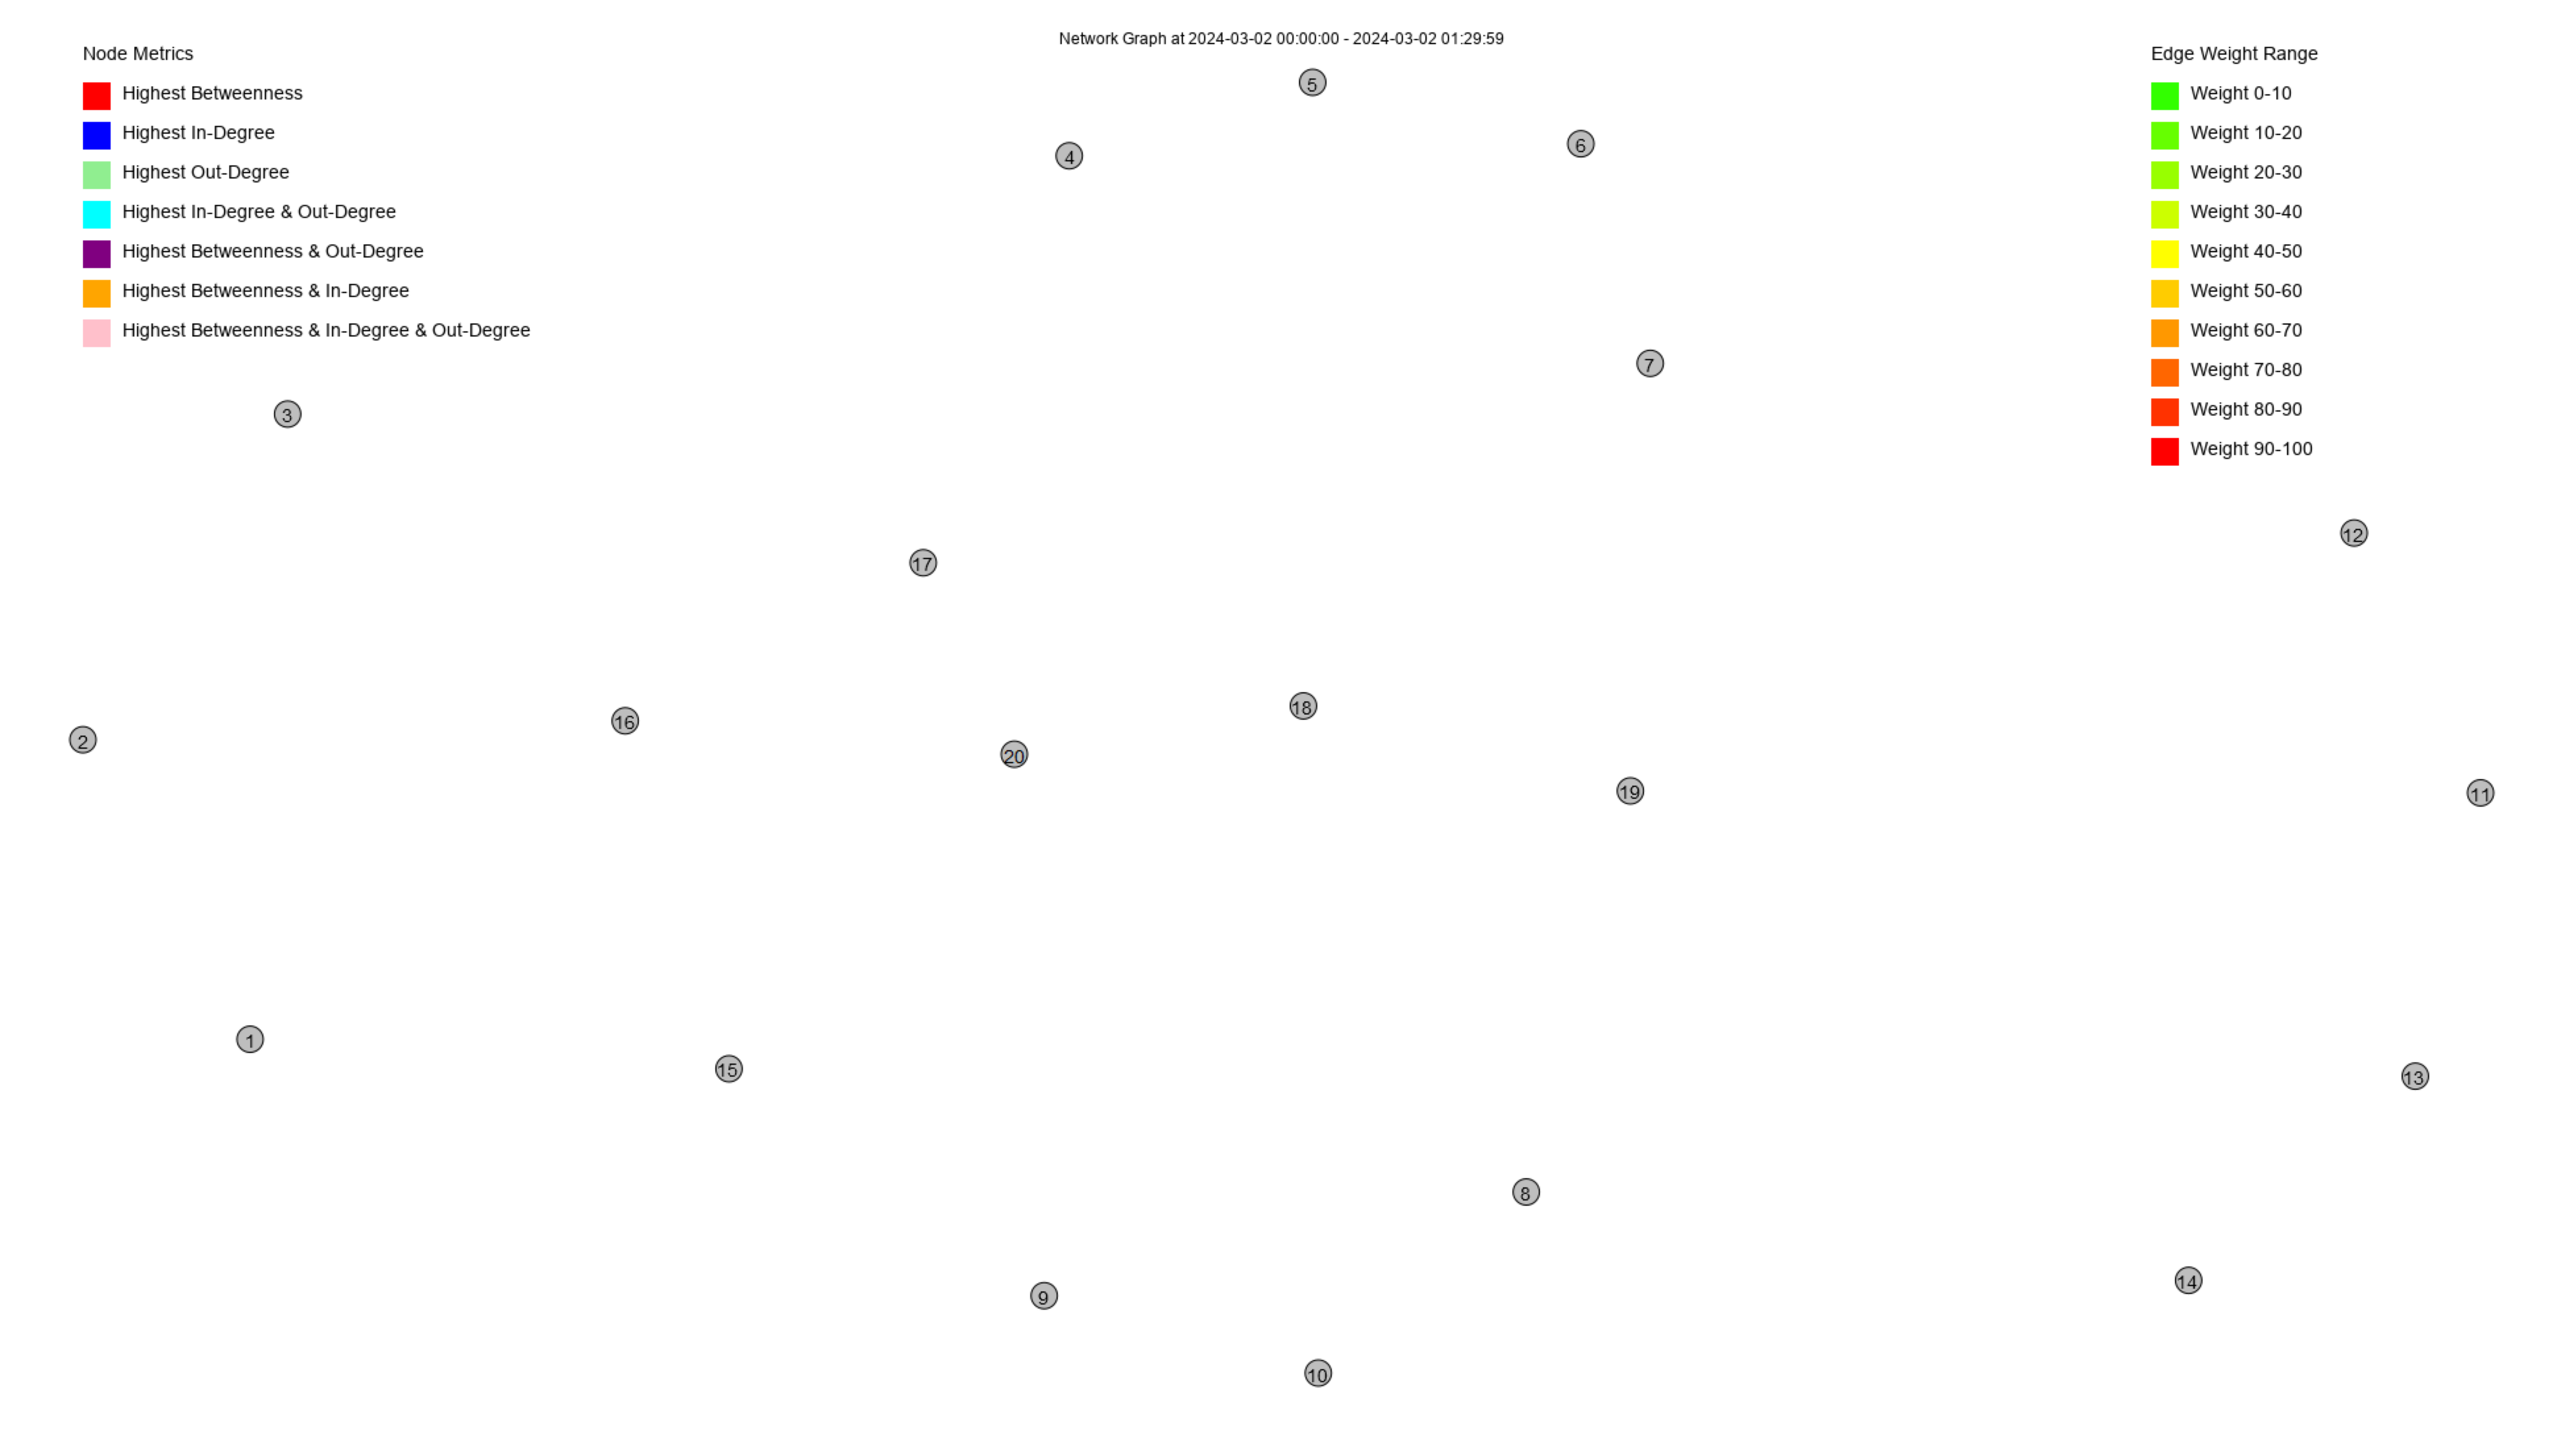

In [65]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from concurrent.futures import ThreadPoolExecutor
from PIL import Image
import time
import re


time_between_images = 600 # ms
png_counter = 97

# Function to load an image
def load_image(file_path):
    return np.array(Image.open(file_path))

# Get all PNG files in the directory starting from graph_1.png
image_files = [f"./experimenteel/graph_{i}.png" for i in range(1, png_counter)]

# Sort image files numerically
def sort_numerically(file_list):
    return sorted(file_list, key=lambda x: int(re.findall(r'\d+', x)[0]), reverse=False) # reverse order

sorted_image_files = sort_numerically(image_files)

# Measure time for loading images
start_time = time.time()
with ThreadPoolExecutor() as executor:
    images = list(executor.map(load_image, sorted_image_files))
load_time = time.time() - start_time
print(f"Time to load {png_counter-1} images: {load_time:.2f} seconds")

# Set up a Full HD resolution figure
fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=300)  # 19.2 inches * 100 dpi = 1920 pixels, 10.8 inches * 100 dpi = 1080 pixels
ax.axis('off')

# Display the first image initially
im = ax.imshow(images[0])

def update(i):
    im.set_array(images[i])
    return [im]

# Measure time for creating animation
start_time = time.time()
ani = FuncAnimation(fig, update, frames=len(images), interval=time_between_images, blit=True)
create_time = time.time() - start_time
print(f"Time to create animation: {create_time:.2f} seconds")

# Measure time for saving animation with Full HD settings
start_time = time.time()
ani.save('graph_animation.mp4', writer='ffmpeg', dpi=300, extra_args=['-vcodec', 'libx264', '-preset', 'ultrafast', '-crf', '18'])
save_time = time.time() - start_time
print(f"Time to save animation: {save_time:.2f} seconds")

print("Video has been created and saved as 'graph_animation.mp4'.")

plt.close(fig)



In [30]:
from IPython.display import Video
Video('graph_animation.mp4', embed=True, width=1920, height=1080)

## Basic Analysis


In [29]:
# Ensure the IDs are treated as integers and then convert to strings
df['FromParticipantId'] = df['FromParticipantId'].astype(int).astype(str)
df['ToParticipantId'] = df['ToParticipantId'].astype(int).astype(str)

# Extract all unique participants for creating nodes
all_participants = np.unique(np.concatenate((df['FromParticipantId'].unique(), df['ToParticipantId'].unique())))

# Set a random seed for layout consistency
np.random.seed(75)

# Create a graph with participants as nodes for layout computation
g = Graph(directed=True)
g.add_vertices(all_participants)
g.vs['name'] = all_participants

# Add edges from minute_df for layout computation
transaction_sums = df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
for _, row in transaction_sums.iterrows():
    from_id = str(row['FromParticipantId'])
    to_id = str(row['ToParticipantId'])
    if row['Value'] != 0:
        g.add_edge(from_id, to_id, weight=row['Value'])


In [30]:
#print basic network statistics
betw=g.betweenness()
print(betw)
degree=g.degree()
print(degree)
closeness=g.closeness()
print(closeness)
pagerank=g.pagerank()
print(pagerank)
avg_path=g.average_path_length()
print(avg_path)
clustering_coeff=g.transitivity_undirected()
print(clustering_coeff)

[0.25, 0.2222222222222222, 0.0, 0.0, 0.0, 0.0, 10.472222222222221, 8.88888888888889, 10.0, 0.0, 77.83333333333334, 0.0, 64.97222222222221, 0.25, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.0]
[9, 9, 7, 7, 7, 7, 12, 13, 14, 10, 23, 5, 27, 9, 12, 12, 12, 12, 9, 6]
[0.5277777777777778, 0.59375, 0.48717948717948717, 0.48717948717948717, 0.48717948717948717, 0.48717948717948717, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.59375, 0.7916666666666666, 0.5135135135135135, 0.8260869565217391, 0.5277777777777778, 0.6129032258064516, 0.6129032258064516, 0.6129032258064516, 0.6129032258064516, 0.59375, 0.59375]
[0.03603823979789986, 0.04092704178373438, 0.031451098195499676, 0.031451098195499676, 0.031451098195499676, 0.031451098195499676, 0.03920625125712741, 0.049243806017199396, 0.03518853471110625, 0.011401023095868632, 0.1187665752058856, 0.04216474056354282, 0.11156766357436088, 0.03603823979789986, 0.0657756028667159

### Degree Distribution

Text(0.5, 1.0, 'Degree distribution')

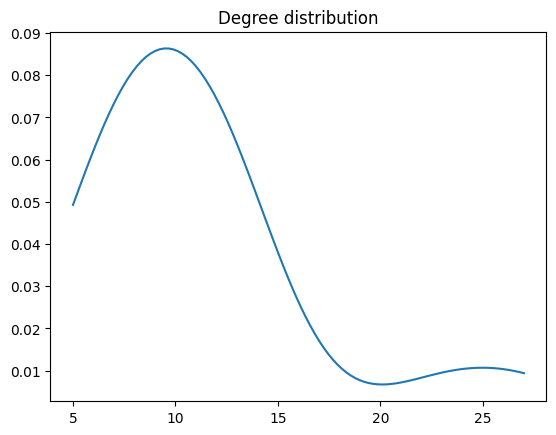

In [32]:
# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel
kde = gaussian_kde(degree)
# these are the values over wich your kernel will be evaluated
dist_space = np.linspace( min(degree), max(degree), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.title("Degree distribution")

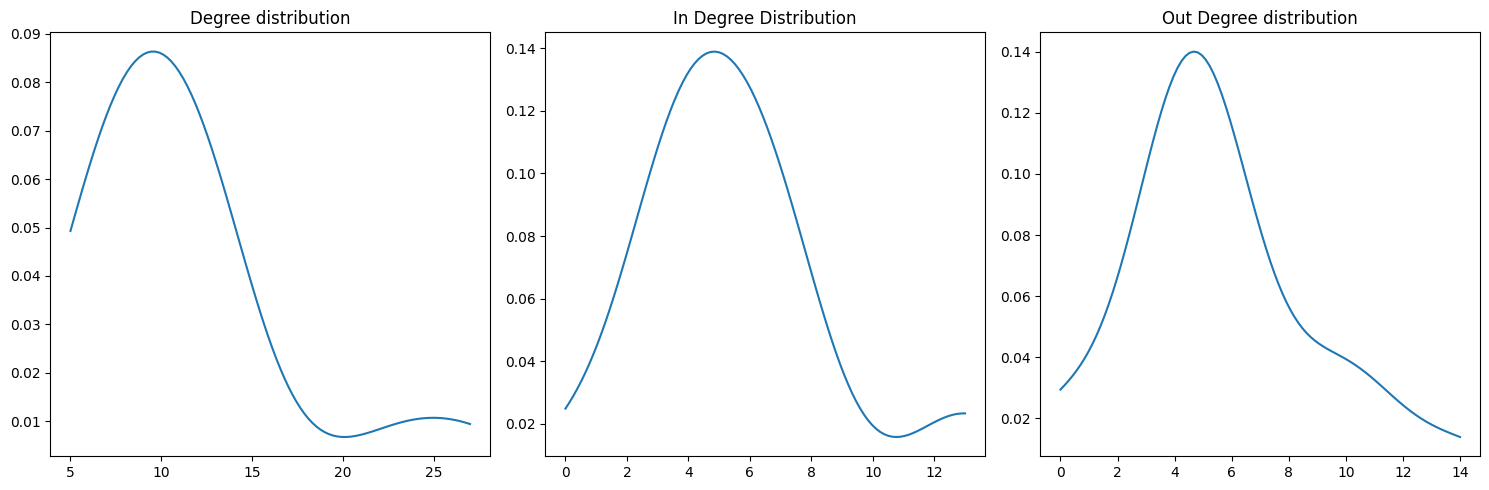

In [33]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot 1: Degree distribution
degree=g.degree()
kde = gaussian_kde(degree)
dist_space = np.linspace( min(degree), max(degree), 100 )
axes[0].plot(dist_space, kde(dist_space))
axes[0].set_title("Degree distribution")

# Plot 2: In degree distribution
in_degree=g.indegree()
kde = gaussian_kde(in_degree)
dist_space = np.linspace( min(in_degree), max(in_degree), 100 )
axes[1].plot(dist_space, kde(dist_space))
axes[1].set_title("In Degree Distribution")

# Plot 3: Out Degree distribution
out_degree=g.outdegree()
kde = gaussian_kde(out_degree)
dist_space = np.linspace( min(out_degree), max(out_degree), 100 )
axes[2].plot(dist_space, kde(dist_space))
axes[2].set_title("Out Degree distribution")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

### Betweenness Distribution

Text(0.5, 1.0, 'Betweenness distribution')

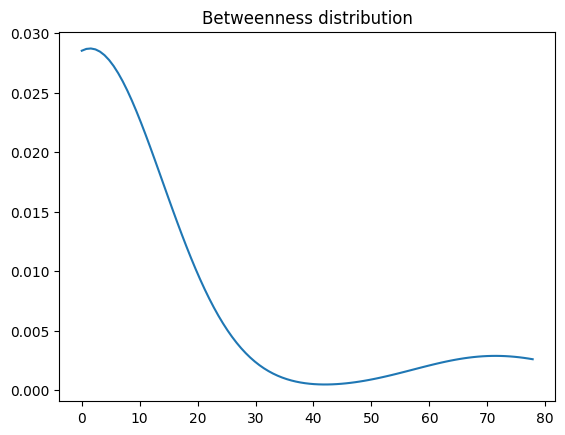

In [34]:
# Estimation of the probability denstity function using a kernel-density estimation using Gaussian kernel
btw=g.betweenness()
kde = gaussian_kde(btw)
# these are the values over wich your kernel will be evaluated
dist_space = np.linspace( min(btw), max(btw), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.title("Betweenness distribution")

In [35]:
# Find nodes with the highest degree
max_degree_value = max(degree)
max_degree_nodes = [node for node, node_degree in enumerate(degree) if node_degree == max_degree_value]
max_degree_nodes_labels = [g.vs[node]["name"] for node in list(max_degree_nodes)]
max_degree_nodes_id = [g.vs[node]["name"] for node in list(max_degree_nodes)]


# Find nodes with the highest betweenness
max_betweenness_value = max(btw)
max_betweenness_nodes = [node for node, betweenness in enumerate(btw) if betweenness == max_betweenness_value]
max_betweenness_nodes_labels = [g.vs[node]["name"] for node in list(max_betweenness_nodes)]
max_betweenness_nodes_id = [g.vs[node]["name"] for node in list(max_betweenness_nodes)]


print(f"Nodes with the highest degree: {max_degree_nodes_labels} (Degree: {max_degree_value})")
print(f"Nodes with the highest betweenness: {max_betweenness_nodes_labels} (Betweenness: {max_betweenness_value})")

Nodes with the highest degree: ['20'] (Degree: 27)
Nodes with the highest betweenness: ['19'] (Betweenness: 77.83333333333334)


Top 3 nodes by degree: ['20', '19', '17'] (Degrees: [27, 23, 14])
Top 3 nodes by betweenness: ['19', '20', '15'] (Betweenness: [77.83333333333334, 64.97222222222221, 10.472222222222221])


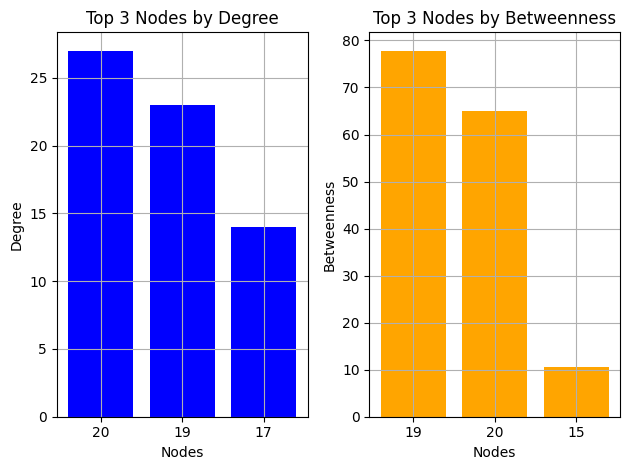

In [37]:
# Calculate degrees and betweenness centrality for all nodes
degree = g.degree()
betweenness = g.betweenness()

# Get the top 3 nodes by degree
top3_degree_nodes = sorted(range(len(degree)), key=lambda i: degree[i], reverse=True)[:3]
top3_degree_values = [degree[i] for i in top3_degree_nodes]
top3_degree_labels = [g.vs[i]["name"] for i in top3_degree_nodes]

# Get the top 3 nodes by betweenness
top3_betweenness_nodes = sorted(range(len(betweenness)), key=lambda i: betweenness[i], reverse=True)[:3]
top3_betweenness_values = [betweenness[i] for i in top3_betweenness_nodes]
top3_betweenness_labels = [g.vs[i]["name"] for i in top3_betweenness_nodes]

print(f"Top 3 nodes by degree: {top3_degree_labels} (Degrees: {top3_degree_values})")
print(f"Top 3 nodes by betweenness: {top3_betweenness_labels} (Betweenness: {top3_betweenness_values})")

# Plot for top 3 nodes by degree
plt.subplot(1, 2, 1)
plt.bar(top3_degree_labels, top3_degree_values, color='blue')
plt.title('Top 3 Nodes by Degree')
plt.xlabel('Nodes')
plt.ylabel('Degree')
plt.grid(True)

# Plot for top 3 nodes by betweenness
plt.subplot(1, 2, 2)
plt.bar(top3_betweenness_labels, top3_betweenness_values, color='orange')
plt.title('Top 3 Nodes by Betweenness')
plt.xlabel('Nodes')
plt.ylabel('Betweenness')
plt.grid(True)

# Save and show the plots
plt.tight_layout()
plt.savefig('top_nodes_statistics.png')
plt.show()


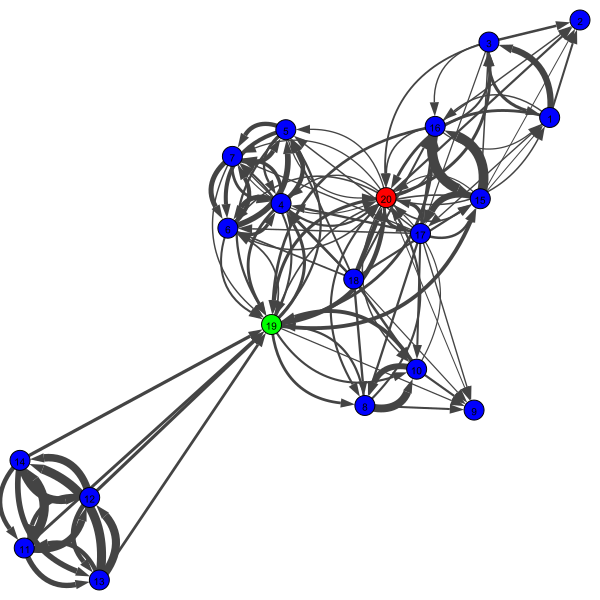

In [39]:
#visual with the nodes with the highest betweenness in yellow
# Normalize edge weights for visualization
weights = np.array(g.es["weight"])
normalized_weights = 1 + 9 * (weights - weights.min()) / (weights.max() - weights.min())
# Create plot using Fruchterman-Rheingold
layout_fr = g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"]=10
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["name"]
visual_style["layout"] = layout_fr
visual_style["edge_width"]=normalized_weights
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

#give a different colour to the nodes with the highest betweenness, and highest degree
g.vs['color']='blue'
for i in max_betweenness_nodes:
  g.vs[i]['color']='yellow'
for i in max_degree_nodes:
  g.vs[i]['color']='red'
for i in max_degree_nodes and max_betweenness_nodes:
  g.vs[i]['color']='green'

visual_style["vertex_color"] = g.vs['color']


ig.plot(g, **visual_style)

number of nodes removed: 1


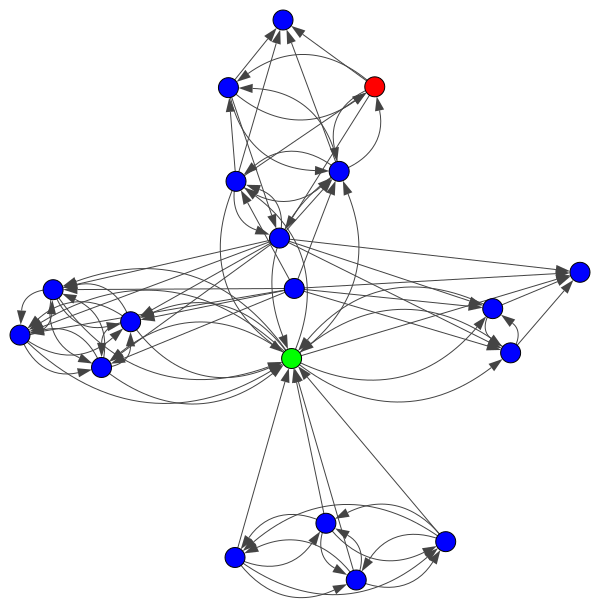

In [40]:
#run this cell to remove the nodes with the highest degree
#it takes a few iterations with deletion of nodes before the network starts to collapse

max_degree_nodes = [node for node, node_degree in enumerate(g.degree()) if node_degree == max(g.degree())]
g.delete_vertices(max_degree_nodes)
print("number of nodes removed:", len(max_degree_nodes))

weights = np.array(g.es["weight"])
normalized_weights = 1 + 9 * (weights - weights.min()) / (weights.max() - weights.min())
# Create plot using Fruchterman-Rheingold
layout_fr = g.layout("fr")

visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_label_size"]=10
visual_style["vertex_color"] = "blue"
visual_style["vertex_label"] = g.vs["name"]
visual_style["layout"] = layout_fr
visual_style["edge_width"]=normalized_weights
visual_style["bbox"] = (600, 600)
visual_style["margin"] = 20

#give a different colour to the nodes with the highest betweenness, and highest degree
g.vs['color']='blue'
for i in max_betweenness_nodes:
  g.vs[i]['color']='yellow'
for i in max_degree_nodes:
  g.vs[i]['color']='red'
for i in max_degree_nodes and max_betweenness_nodes:
  g.vs[i]['color']='green'

visual_style["vertex_color"] = g.vs['color']
ig.plot(g)

### Experimenteel

In [59]:
import pandas as pd
from igraph import Graph, plot
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

timeframe = 15

# Function to save the plot as a PNG file with the correct resolution
def save_plot(g, target, **visual_style):
    # Create a figure with the specified size and resolution
    fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=300)
    plot(g, target=target, **visual_style)
    plt.close(fig)  # Close the figure to release memory

# Create a custom colormap from green to red
colors = ["#00FF00", "#FFFF00", "#FF0000"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_heatmap", colors)

# Convert Starttime to datetime
df['Starttime'] = pd.to_datetime(df['Starttime'])

# Define the start and end of the day
start_day = pd.to_datetime('2024-03-02 00:00:00')
end_day = pd.to_datetime('2024-03-02 23:59:59')
test_start = pd.to_datetime('2024-03-02 01:35:00')
test_stop = pd.to_datetime('2024-03-02 01:40:00')  # Shortened range for testing

minute_df = df[(df['Starttime'] >= start_day) & (df['Starttime'] <= end_day)].copy()

# Ensure the IDs are treated as integers and then convert to strings
minute_df['FromParticipantId'] = minute_df['FromParticipantId'].astype(int).astype(str)
minute_df['ToParticipantId'] = minute_df['ToParticipantId'].astype(int).astype(str)

# Extract all unique participants for creating nodes
all_participants = np.unique(np.concatenate((minute_df['FromParticipantId'].unique(), minute_df['ToParticipantId'].unique())))

# Set a random seed for layout consistency
np.random.seed(75)

# Create a graph with participants as nodes for layout computation
g_all = Graph(directed=True)
g_all.add_vertices(all_participants)
g_all.vs['name'] = all_participants

# Add edges from minute_df for layout computation
transaction_sums = minute_df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
for _, row in transaction_sums.iterrows():
    from_id = str(row['FromParticipantId'])
    to_id = str(row['ToParticipantId'])
    if row['Value'] != 0:
        g_all.add_edge(from_id, to_id, weight=row['Value'])

# Precompute the layout for all nodes (to keep positions of singletons consistent)
fixed_layout = g_all.layout('kk')  # Fruchterman-Reingold layout

png_counter = 1
# Loop through each minute of the day
current_time = start_day
next_time = current_time + pd.Timedelta(minutes=timeframe) - pd.Timedelta(seconds=1)
while next_time <= end_day:
    
    # Filter the DataFrame to keep only transactions within the current minute
    minute_df = df[(df['Starttime'] >= current_time) & (df['Starttime'] <= next_time)].copy()
    
    # Convert IDs to string after filtering to maintain consistency
    minute_df['FromParticipantId'] = minute_df['FromParticipantId'].astype(str)
    minute_df['ToParticipantId'] = minute_df['ToParticipantId'].astype(str)
    
    # Create a graph with participants as nodes
    g = Graph(directed=True)
    g.add_vertices(all_participants)
    g.vs['name'] = all_participants  # Set the name attribute for each vertex
    
    if not minute_df.empty:
        # Aggregate transaction values by pairs
        transaction_sums = minute_df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
        
        # Add aggregated edges, ensuring consistency in string usage
        for _, row in transaction_sums.iterrows():
            try:
                if row['Value'] != 0:
                    g.add_edge(row['FromParticipantId'], row['ToParticipantId'], weight=row['Value'])
            except ValueError as e:
                print(f"Error adding edge from {row['FromParticipantId']} to {row['ToParticipantId']}: {e}")

        # Normalize edge weights for visualization to the range 0-100
        weights = np.array(g.es["weight"])
        if len(weights) > 1:
            min_weight = weights.min()
            max_weight = weights.max()
            normalized_weights = 100 * (weights - min_weight) / (max_weight - min_weight)
        else:
            normalized_weights = np.array([50])  # Set to a midpoint value if only one weight

        # # Determine edge colors based on normalized weights
        # edge_colors_by_weight = [edge_colors[int(weight // 10)] for weight in normalized_weights]

        # Determine edge colors based on normalized weights using the custom colormap
        norm = mcolors.Normalize(vmin=0, vmax=100)
        edge_colors_by_weight = [mcolors.to_hex(custom_cmap(norm(weight))) for weight in normalized_weights]


        # Calculate metrics for coloring nodes
        betweenness = g.betweenness()
        in_degrees = g.indegree()
        out_degrees = g.outdegree()

        # Identify nodes with the highest metrics
        max_betweenness = np.max(betweenness)
        max_in_degree = np.max(in_degrees)
        max_out_degree = np.max(out_degrees)

        max_betweenness_nodes = [v['name'] for v, b in zip(g.vs, betweenness) if b == max_betweenness]
        max_in_degree_nodes = [v['name'] for v, d in zip(g.vs, in_degrees) if d == max_in_degree]
        max_out_degree_nodes = [v['name'] for v, d in zip(g.vs, out_degrees) if d == max_out_degree]
        
        # Set colors for nodes
        node_colors = ["grey"] * len(g.vs)

        # Check for combined conditions first
        for node in max_betweenness_nodes:
            if node in max_in_degree_nodes and node in max_out_degree_nodes:
                node_colors[g.vs.find(name=node).index] = "pink"  # Combined color for highest betweenness, in-degree, and out-degree
            elif node in max_out_degree_nodes:
                node_colors[g.vs.find(name=node).index] = "purple"  # Combined color for highest betweenness and out-degree
            elif node in max_in_degree_nodes:
                node_colors[g.vs.find(name=node).index] = "orange"  # Combined color for highest betweenness and in-degree
            else:
                node_colors[g.vs.find(name=node).index] = "red"  # Betweenness

        for node in max_in_degree_nodes:
            if node_colors[g.vs.find(name=node).index] == "grey":
                node_colors[g.vs.find(name=node).index] = "blue"  # In-degree

        for node in max_out_degree_nodes:
            if node_colors[g.vs.find(name=node).index] == "grey":
                node_colors[g.vs.find(name=node).index] = "green"  # Out-degree


    else:
        # Set all nodes to grey when there are no edges
        node_colors = ["grey"] * len(g.vs)
        normalized_weights = []
        edge_colors_by_weight = []

    # Use the precomputed layout for visualization
    layout = fixed_layout
    
    # Visualize the graph
    visual_style = {
        "vertex_size": 20,
        "vertex_label": g.vs['name'],
        "layout": layout,
        "bbox": (1920, 1080),
        "margin": 50,
        "vertex_color": node_colors
    }
    if len(normalized_weights) > 0:
        visual_style["edge_width"] = normalized_weights/10  # Add edge widths if there are edges
        visual_style["edge_color"] = edge_colors_by_weight  # Add edge colors based on weights

    
    # Save the plot as a PNG file
    file_name = f"experimenteel/graph_{png_counter}.png"
    save_plot(g, target=file_name, **visual_style)

    # Add title using PIL
    # Open the image
    image = Image.open(file_name)
    draw = ImageDraw.Draw(image)
    
    # Define the title text
    title_text = f"Network Graph at {current_time.strftime('%Y-%m-%d %H:%M:%S')} - {next_time.strftime('%Y-%m-%d %H:%M:%S')}"
    
    # Define font and size (adjust path to your font if necessary)
    font = ImageFont.truetype("arial.ttf", 12)
    
    # Calculate text bounding box
    text_bbox = draw.textbbox((0, 0), title_text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    
    # Set text position
    text_position = ((image.width - text_width) // 2, 10)
    
    # Add text to image
    draw.text(text_position, title_text, font=font, fill="black")

    # Define legend items
    legend_items_upper = [
        ("Highest Betweenness", "red"),
        ("Highest In-Degree", "blue"),
        ("Highest Out-Degree", "lightgreen"),
        ("Highest Betweenness & Out-Degree", "purple"),
        ("Highest Betweenness & In-Degree", "orange"),
        ("Highest Betweenness & In-Degree & Out-Degree", "pink")
    ]
    
    ### Other measures
    # legend_items_lower = [
    #     ("Highest Closeness", "cyan"),
    #     ("Highest Eigenvector", "magenta"),
    #     ("Highest PageRank", "yellow")
    # ]
    
    # Draw upper legend with title
    legend_font = ImageFont.truetype("arial.ttf", 14)  # Smaller font size
    legend_x = 50
    legend_y = 50  # Upper left corner
    legend_box_size = 20  # Smaller box size
    draw.text((legend_x, legend_y - 30), "Node Metrics", font=legend_font, fill="black")  # Legend title
    for text, color in legend_items_upper:
        draw.rectangle([legend_x, legend_y, legend_x + legend_box_size, legend_y + legend_box_size], fill=color)
        draw.text((legend_x + legend_box_size + 10, legend_y), text, font=legend_font, fill="black")
        legend_y += legend_box_size + 10

    # Define edge legend items
    edge_legend_items = [
        ("Weight 0-10", mcolors.to_hex(custom_cmap(0.1))),
        ("Weight 10-20", mcolors.to_hex(custom_cmap(0.2))),
        ("Weight 20-30", mcolors.to_hex(custom_cmap(0.3))),
        ("Weight 30-40", mcolors.to_hex(custom_cmap(0.4))),
        ("Weight 40-50", mcolors.to_hex(custom_cmap(0.5))),
        ("Weight 50-60", mcolors.to_hex(custom_cmap(0.6))),
        ("Weight 60-70", mcolors.to_hex(custom_cmap(0.7))),
        ("Weight 70-80", mcolors.to_hex(custom_cmap(0.8))),
        ("Weight 80-90", mcolors.to_hex(custom_cmap(0.9))),
        ("Weight 90-100", mcolors.to_hex(custom_cmap(1.0)))
    ]
    
    # Draw edge legend with title
    legend_x = image.width - 300  # Upper right corner
    legend_y = 50
    legend_font_size = 14  # Smaller font size
    legend_box_size = 20  # Smaller box size
    draw.text((legend_x, legend_y - 30), "Edge Weight Range", font=ImageFont.truetype("arial.ttf", legend_font_size), fill="black")  # Legend title
    for text, color in edge_legend_items:
        draw.rectangle([legend_x, legend_y, legend_x + legend_box_size, legend_y + legend_box_size], fill=color)
        draw.text((legend_x + legend_box_size + 10, legend_y), text, font=ImageFont.truetype("arial.ttf", legend_font_size), fill="black")
        legend_y += legend_box_size + 10  # Adjust the spacing between items
    
    # Save the image with the title
    image.save(file_name)
    
    # Move to the next minute
    next_time += pd.Timedelta(minutes=timeframe)
    png_counter += 1




In [63]:
import pandas as pd
from igraph import Graph, plot
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

timeframe = 15

# Function to save the plot as a PNG file with the correct resolution
def save_plot(g, target, **visual_style):
    # Create a figure with the specified size and resolution
    fig, ax = plt.subplots(figsize=(19.2, 10.8), dpi=300)
    plot(g, target=target, **visual_style)
    plt.close(fig)  # Close the figure to release memory

# Create a custom colormap from green to red
colors = ["#00FF00", "#FFFF00", "#FF0000"]
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_heatmap", colors)

# Convert Starttime to datetime
df['Starttime'] = pd.to_datetime(df['Starttime'])

# Define the start and end of the day
start_day = pd.to_datetime('2024-03-02 00:00:00')
end_day = pd.to_datetime('2024-03-02 23:59:59')
test_start = pd.to_datetime('2024-03-02 01:35:00')
test_stop = pd.to_datetime('2024-03-02 01:40:00')  # Shortened range for testing

minute_df = df[(df['Starttime'] >= start_day) & (df['Starttime'] <= end_day)].copy()

# Ensure the IDs are treated as integers and then convert to strings
minute_df['FromParticipantId'] = minute_df['FromParticipantId'].astype(int).astype(str)
minute_df['ToParticipantId'] = minute_df['ToParticipantId'].astype(int).astype(str)

# Extract all unique participants for creating nodes
all_participants = np.unique(np.concatenate((minute_df['FromParticipantId'].unique(), minute_df['ToParticipantId'].unique())))

# Set a random seed for layout consistency
np.random.seed(75)

# Create a graph with participants as nodes for layout computation
g_all = Graph(directed=True)
g_all.add_vertices(all_participants)
g_all.vs['name'] = all_participants

# Add edges from minute_df for layout computation
transaction_sums = minute_df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
for _, row in transaction_sums.iterrows():
    from_id = str(row['FromParticipantId'])
    to_id = str(row['ToParticipantId'])
    if row['Value'] != 0:
        g_all.add_edge(from_id, to_id, weight=row['Value'])

# Precompute the layout for all nodes (to keep positions of singletons consistent)
fixed_layout = g_all.layout('kk')  # Fruchterman-Reingold layout

png_counter = 1
# Loop through each minute of the day
current_time = start_day
next_time = current_time + pd.Timedelta(minutes=timeframe) - pd.Timedelta(seconds=1)
while next_time <= end_day:
    
    # Filter the DataFrame to keep only transactions within the current minute
    minute_df = df[(df['Starttime'] >= current_time) & (df['Starttime'] <= next_time)].copy()
    
    # Convert IDs to string after filtering to maintain consistency
    minute_df['FromParticipantId'] = minute_df['FromParticipantId'].astype(str)
    minute_df['ToParticipantId'] = minute_df['ToParticipantId'].astype(str)
    
    # Create a graph with participants as nodes
    g = Graph(directed=True)
    g.add_vertices(all_participants)
    g.vs['name'] = all_participants  # Set the name attribute for each vertex
    
    if not minute_df.empty:
        # Aggregate transaction values by pairs
        transaction_sums = minute_df.pivot_table(index=['FromParticipantId', 'ToParticipantId'], values='Value', aggfunc='sum').reset_index()
        
        # Add aggregated edges, ensuring consistency in string usage
        for _, row in transaction_sums.iterrows():
            try:
                if row['Value'] != 0:
                    g.add_edge(row['FromParticipantId'], row['ToParticipantId'], weight=row['Value'])
            except ValueError as e:
                print(f"Error adding edge from {row['FromParticipantId']} to {row['ToParticipantId']}: {e}")

        # Normalize edge weights for visualization to the range 0-100
        weights = np.array(g.es["weight"])
        if len(weights) > 1:
            min_weight = weights.min()
            max_weight = weights.max()
            normalized_weights = 100 * (weights - min_weight) / (max_weight - min_weight)
        else:
            normalized_weights = np.array([50])  # Set to a midpoint value if only one weight

        # Determine edge colors based on normalized weights using the custom colormap
        norm = mcolors.Normalize(vmin=0, vmax=100)
        edge_colors_by_weight = [mcolors.to_hex(custom_cmap(norm(weight))) for weight in normalized_weights]

        # Calculate metrics for coloring nodes
        betweenness = g.betweenness()
        in_degrees = g.indegree()
        out_degrees = g.outdegree()

        # Identify nodes with the highest metrics
        max_betweenness = np.max(betweenness)
        max_in_degree = np.max(in_degrees)
        max_out_degree = np.max(out_degrees)

        max_betweenness_nodes = [v['name'] for v, b in zip(g.vs, betweenness) if b == max_betweenness]
        max_in_degree_nodes = [v['name'] for v, d in zip(g.vs, in_degrees) if d == max_in_degree]
        max_out_degree_nodes = [v['name'] for v, d in zip(g.vs, out_degrees) if d == max_out_degree]

        # Set colors for nodes
        node_colors = ["grey"] * len(g.vs)

        # Create a dictionary to keep track of the final color for each node
        node_final_colors = {v['name']: "grey" for v in g.vs}

        # Apply colors with priority: combined > individual
        for node in max_betweenness_nodes:
            if node in max_in_degree_nodes and node in max_out_degree_nodes:
                node_final_colors[node] = "pink"  # Combined color for highest betweenness, in-degree, and out-degree
            elif node in max_in_degree_nodes:
                node_final_colors[node] = "orange"  # Combined color for highest betweenness and in-degree
            elif node in max_out_degree_nodes:
                node_final_colors[node] = "purple"  # Combined color for highest betweenness and out-degree
            else:
                node_final_colors[node] = "red"  # Betweenness

        for node in max_in_degree_nodes:
            if node in max_out_degree_nodes and node_final_colors[node] == "grey":
                node_final_colors[node] = "cyan"  # Combined color for highest in-degree and out-degree
            elif node_final_colors[node] == "grey":
                node_final_colors[node] = "blue"  # In-degree

        for node in max_out_degree_nodes:
            if node_final_colors[node] == "grey":
                node_final_colors[node] = "green"  # Out-degree

        # Update the node_colors list based on the final colors
        node_colors = [node_final_colors[v['name']] for v in g.vs]

    else:
        # Set all nodes to grey when there are no edges
        node_colors = ["grey"] * len(g.vs)
        normalized_weights = []
        edge_colors_by_weight = []

    # Use the precomputed layout for visualization
    layout = fixed_layout
    
    # Visualize the graph
    visual_style = {
        "vertex_size": 20,
        "vertex_label": g.vs['name'],
        "layout": layout,
        "bbox": (1920, 1080),
        "margin": 50,
        "vertex_color": node_colors
    }
    if len(normalized_weights) > 0:
        visual_style["edge_width"] = normalized_weights / 10  # Add edge widths if there are edges
        visual_style["edge_color"] = edge_colors_by_weight  # Add edge colors based on weights

    # Save the plot as a PNG file
    file_name = f"experimenteel/graph_{png_counter}.png"
    save_plot(g, target=file_name, **visual_style)

    # Add title using PIL
    # Open the image
    image = Image.open(file_name)
    draw = ImageDraw.Draw(image)
    
    # Define the title text
    title_text = f"Network Graph at {current_time.strftime('%Y-%m-%d %H:%M:%S')} - {next_time.strftime('%Y-%m-%d %H:%M:%S')}"
    
    # Define font and size (adjust path to your font if necessary)
    font = ImageFont.truetype("arial.ttf", 12)
    
    # Calculate text bounding box
    text_bbox = draw.textbbox((0, 0), title_text, font=font)
    text_width = text_bbox[2] - text_bbox[0]
    text_height = text_bbox[3] - text_bbox[1]
    
    # Set text position
    text_position = ((image.width - text_width) // 2, 10)
    
    # Add text to image
    draw.text(text_position, title_text, font=font, fill="black")

    # Define legend items
    legend_items_upper = [
        ("Highest Betweenness", "red"),
        ("Highest In-Degree", "blue"),
        ("Highest Out-Degree", "lightgreen"),
        ("Highest In-Degree & Out-Degree", "cyan"),
        ("Highest Betweenness & Out-Degree", "purple"),
        ("Highest Betweenness & In-Degree", "orange"),
        ("Highest Betweenness & In-Degree & Out-Degree", "pink")
    ]
    
    # Draw upper legend with title
    legend_font = ImageFont.truetype("arial.ttf", 14)  # Smaller font size
    legend_x = 50
    legend_y = 50  # Upper left corner
    legend_box_size = 20  # Smaller box size
    draw.text((legend_x, legend_y - 30), "Node Metrics", font=legend_font, fill="black")  # Legend title
    for text, color in legend_items_upper:
        draw.rectangle([legend_x, legend_y, legend_x + legend_box_size, legend_y + legend_box_size], fill=color)
        draw.text((legend_x + legend_box_size + 10, legend_y), text, font=legend_font, fill="black")
        legend_y += legend_box_size + 10
    
    # Define edge legend items
    edge_legend_items = [
        ("Weight 0-10", mcolors.to_hex(custom_cmap(0.1))),
        ("Weight 10-20", mcolors.to_hex(custom_cmap(0.2))),
        ("Weight 20-30", mcolors.to_hex(custom_cmap(0.3))),
        ("Weight 30-40", mcolors.to_hex(custom_cmap(0.4))),
        ("Weight 40-50", mcolors.to_hex(custom_cmap(0.5))),
        ("Weight 50-60", mcolors.to_hex(custom_cmap(0.6))),
        ("Weight 60-70", mcolors.to_hex(custom_cmap(0.7))),
        ("Weight 70-80", mcolors.to_hex(custom_cmap(0.8))),
        ("Weight 80-90", mcolors.to_hex(custom_cmap(0.9))),
        ("Weight 90-100", mcolors.to_hex(custom_cmap(1.0)))
    ]
    
    # Draw edge legend with title
    legend_x = image.width - 300  # Upper right corner
    legend_y = 50
    legend_font_size = 14  # Smaller font size
    legend_box_size = 20  # Smaller box size
    draw.text((legend_x, legend_y - 30), "Edge Weight Range", font=ImageFont.truetype("arial.ttf", legend_font_size), fill="black")  # Legend title
    for text, color in edge_legend_items:
        draw.rectangle([legend_x, legend_y, legend_x + legend_box_size, legend_y + legend_box_size], fill=color)
        draw.text((legend_x + legend_box_size + 10, legend_y), text, font=ImageFont.truetype("arial.ttf", legend_font_size), fill="black")
        legend_y += legend_box_size + 10  # Adjust the spacing between items
    
    # Save the image with the title
    image.save(file_name)
    
    # Move to the next minute
    next_time += pd.Timedelta(minutes=timeframe)
    png_counter += 1


## Community Detection
